# Summary 
 The term 'life expectancy'  mengacu pada jumlah  penduduk atau masyarakan yang  diharapkan bisa hidup. Maksudnya adalah life expextancy ini  mengacu pada  estimasi dari rata rata  umur  kelompok masyarakat tertentu ketika mereka  nantinya meninggal.
 Hal ini sering rumit, mengapa demikian karena  harapan hidup bergantung  pada gaya hidup, bagaimana akses atau fasilitas kesehatan yang disediakan, diet,  status ekonomi dan  angka kematian yang relevan. Kita dapat membayangkan jika usia harapan hidup   sebagai usia yang diharapkan iharapkan untuk hidup seseorang yang lahir pada tahun tertentu jika usia kematian rata-rata tidak berubah selama hidup mereka.


 Sejak awal abad ke-19, angka harapan hidup mulai meningkat secara global dan meningkat lebih dari dua kali lipat. Namun, hal ini dapat dipecah lebih jauh menjadi "harapan hidup sehat" dan "tahun hidup dengan kecacatan". Memahami ekspektasi hidup individu yang hidup dengan disabilitas dapat membantu lebih memahami kelompok orang yang terkena dampak peningkatan harapan hidup. Menyelidiki perubahan dalam harapan hidup yang dipecah menjadi periode yang lebih kecil (beberapa tahun) dapat mengungkapkan lebih banyak informasi tentang apa yang sebenarnya menyebabkan peningkatan ini.

Dataset untuk proyek ini dikumpulkan dari [Our World in Data] (https://ourworldindata.org/life-expectancy#how-has-healthy-life-expectancy-changed) dan berasal dari Institute of Health Metrics and Evaluation. Data yang saya selidiki di sini terdiri dari catatan tentang "Harapan Hidup Sehat" dan "Tahun-tahun Hidup Dengan Cacat" menurut negara dan tahun (1990-2016) tanpa entri yang hilang atau berformat buruk.

# Summary

The term "life expectancy" refers to the number of years a person can expect to live. By definition, life expectancy is based on an estimate of the average age that members of a particular population group will be when they die. Things are often more complicated as the life expectancy depends on lifestyle, access to healthcare, diet, economical status and the relevant mortality data. You can think of life expectancy as the age a person born in a particular year would expect to live if the average age of death did not change over their lifetime.

Since the early 19th century, life expectancy started to increase globally and has more than doubled. However, this can be broken down further into "healthy life expectancy" and "years lived with disability". Understanding life expactancy of individuals living with disability can help better understand the group of people affected by the increase in life expectancy. Investigating the change in life expectancy broken down into smaller periods(few years) can reveal more information on what exactly led to this increase.

The dataset for this project was collected from [Our World in Data](https://ourworldindata.org/life-expectancy#how-has-healthy-life-expectancy-changed) and originates from the Institute of Health Metrics and Evaluation. The data I investigate here consists of records on "Healthy Life Expectancy" and "Years Lived With Disability" by countries and years(1990-2016) with no missing or ill-formatted entries.

# Exploring Data ( Eksplorasi Data)
- jumlah baris 
jumlah baris dan negara yang ada
  - box plot untuk harapan hidup sehat global dan tahun hidup dengan kecacatan dari tahun ke tahun
  - bar plot untuk mean global, min dan max harapan hidup sehat dan tahun hidup dengan kecacatan dari tahun ke tahun

# Exploring the data

An investigation of the dataset will determine the following:
 - number of rows and countries present
 - box plot for global healthy life expectancy and years lived with disability by year
 - bar plot for the global mean, min and max healthy life expectancy and years lived with disability by year

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from scipy import stats
import matplotlib.pyplot as plt 

In [35]:
df = pd.read_csv('healthy-life-expectancy-and-years-lived-with-disability.csv')
df.head()

,Entity,Code,Year,Healthy Life Expectancy (IHME),Years Lived With Disability (IHME)
0,Afghanistan,AFG,1990,43.57,8.03
1,Afghanistan,AFG,1991,43.37,7.91
2,Afghanistan,AFG,1992,43.50,7.90
3,Afghanistan,AFG,1993,43.48,7.85
4,Afghanistan,AFG,1994,42.98,7.70


In [6]:
print("Number of rows : {jumlah}".format(jumlah = df.shape[0]))
print("Number of columns  : {columns}".format(columns = df.shape[1]))


Number of rows : 6102
Number of columns  : 5


In [36]:
df = df.drop('Code', axis = 1).rename(columns={'Entity':'Country', 'Healthy Life Expectancy (IHME)':'Healthy Life Expectancy','Years Lived With Disability (IHME)':'Years Lived With Disability'})


In [37]:
df.columns = df.columns.str.lower()

In [39]:
df.columns = df.columns.str.replace(" ", "_")

In [40]:
df.columns

Index(['country', 'year', 'healthy_life_expectancy',
       'years_lived_with_disability'],
      dtype='object')

In [42]:
df.isnull().sum()

country                        0
year                           0
healthy_life_expectancy        0
years_lived_with_disability    0
dtype: int64

In [46]:
df_year =  df.groupby('year')['healthy_life_expectancy'].agg(['mean', 'min','max'])

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Years Lived With Disability'),
 Text(0.5, 1.0, 'Years Lived With Disability')]

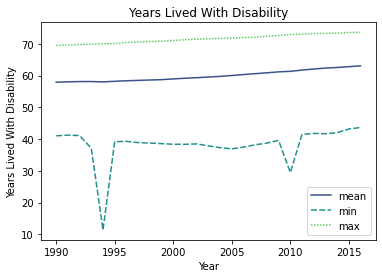

In [55]:

ax = sns.lineplot(data=df_year, palette="viridis")
ax.set(xlabel='Year', ylabel='Years Lived With Disability', title = "Years Lived With Disability" )
 


[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Years Lived With Disability'),
 Text(0.5, 1.0, 'Years Lived With Disability')]

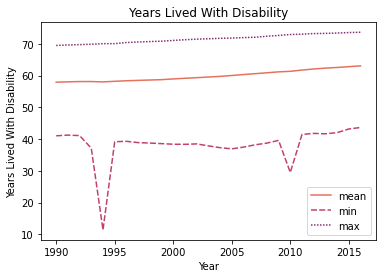

In [56]:

ax = sns.lineplot(data=df_year, palette="flare")
ax.set(xlabel='Year', ylabel='Years Lived With Disability', title = "Years Lived With Disability" )
 

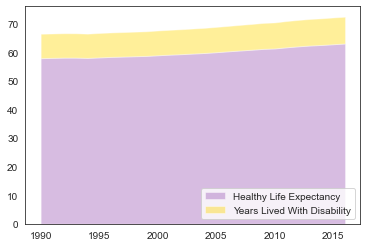

In [101]:
x=df['year'].unique()
mean_hle = np.array(df.groupby('year')['healthy_life_expectancy'].agg(['mean'])).flatten()
mean_ylwd = np.array(df.groupby('year')['years_lived_with_disability'].agg(['mean'])).flatten()
y=[ mean_hle, mean_ylwd ]

f = plt.figure(figsize=(6,4))
palette = sns.color_palette(["#9b59b6", "#ffd700"])
plt.stackplot(x, y, labels=['Healthy Life Expectancy', 'Years Lived With Disability'], colors=palette, alpha=0.4 )
plt.legend(loc='lower right')

[Text(0.5, 16.200000000000003, 'year'),
 Text(16.200000000000003, 0.5, 'Healthy Life Expectancy')]

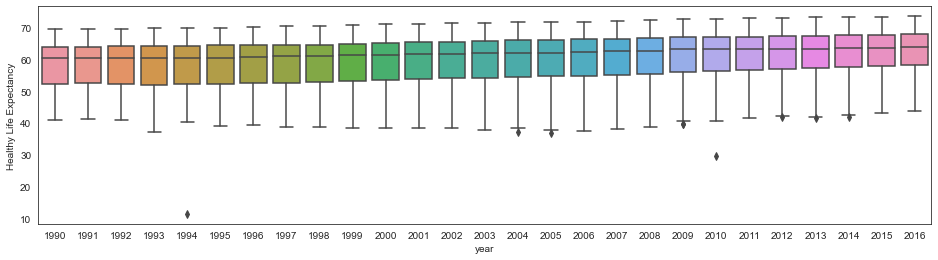

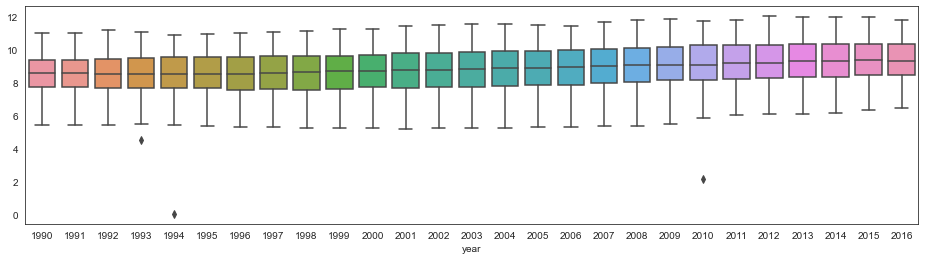

In [71]:
df_hle = df.groupby('year')['healthy_life_expectancy'].apply(lambda x : x.reset_index(drop= True)).unstack().T
df_ylwd = df.groupby('year')['years_lived_with_disability'].apply(lambda x : x.reset_index(drop = True)).unstack().T

sns.set_style('white')
sns.set_palette('dark')
f = plt.figure(figsize=(16,4))
ax = sns.boxplot(data= df_hle)
ax.set(xlabel ='year', ylabel = "Healthy Life Expectancy")

 
af = plt.figure(figsize=(16,4))
x2 = sns.boxplot(data= df_ylwd)
ax2.set(xlabel ='year', ylabel = "Healthy Life Expectancy")

# Feature Engineering da preparing data 
- mendapatkan fitur baru 'Perubahan Global' dari tahun-tahun sebelumnya dan saat ini
- plot perubahan global (= mean) menurut tahun
- plot perubahan menurut tahun per negara

# Featureset engineering and preparing the data
- deriving new feature 'Global Change' from previous and current years
- plot the global(=mean) change by year
- plot the change by year per country

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6102 entries, 0 to 6101
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country                      6102 non-null   object 
 1   year                         6102 non-null   int64  
 2   healthy_life_expectancy      6102 non-null   float64
 3   years_lived_with_disability  6102 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 190.8+ KB


In [91]:
def previous(row, row_shift):
    if np.isnan(row_shift.all()):
        return '0'
    else:
        return row-row_shift

def ad_global_change(data, category):
    change = data.apply(lambda x : previous(x, x.shift(1)))
    change[category][1990] =0
    data['change_'+ category] =  change[category]


In [92]:
hle_data = df.groupby('year')['healthy_life_expectancy'].agg(['mean'])
ylwd_data = df.groupby('year')['years_lived_with_disability'].agg(['mean']) 

In [93]:
ad_global_change(hle_data,'mean')
ad_global_change(ylwd_data,'mean')


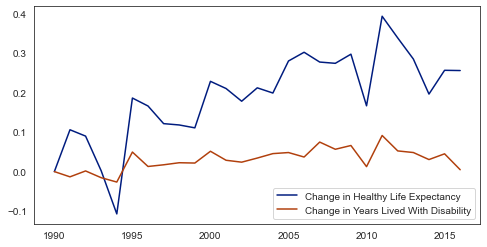

In [95]:
f = plt.figure(figsize=(8,4))
plt.plot(hle_data['change_mean'], label='Change in Healthy Life Expectancy')
plt.plot(ylwd_data['change_mean'], label='Change in Years Lived With Disability')
plt.legend(loc='lower right')

# Hypothesis testing

Plot di atas menunjukkan bahwa ada pertumbuhan yang berkelanjutan baik pada usia harapan hidup sehat maupun tahun hidup dengan kecacatan.

** Hipotesis: ** Dengan asumsi peningkatan harapan hidup, kami mengharapkan pertumbuhan yang sama di tahun-tahun hidup penyandang disabilitas yang berarti mereka memiliki pertumbuhan rata-rata yang sama (perubahan global).

** Hipotesis Alternatif: ** Tidak ada hubungan antara laju peningkatan tahun hidup dengan kecacatan dan angka harapan hidup sehat.

Jalankan uji-t yang membandingkan perubahan global dalam

# Hypothesis testing

The above plot suggests that there is a continuous growth in both healthy life expectancy and years lived with disability.

**Hypothesis:** Assuming a the increase in life expectancy we are expecting the same growth in years lived with disability meaning that they have the same mean growth(global change).

**Alternative Hypothesis:** There is no relationship between the rate of increase in years lived with disability and healthy life expectancy.

Run a t-test comparing the global change in healthy life expectancy to years lived with disability. 

In [98]:
hle = np.array(hle_data.loc[2000:2005]['change_mean'])
ylwd = np.array(ylwd_data.loc[2006:2011]['change_mean'])
stats.ttest_ind(hle, ylwd, equal_var = False)

Ttest_indResult(statistic=8.869929709309053, pvalue=6.247525443440319e-06)

# Results

Nilai p adalah 6.247525443440319e-06 yang lebih kecil dari 0.05. Oleh karena itu kami menolak hipotesis nol pada tingkat signifikansi 5%, yang berarti bahwa pertumbuhan global pada tahun-tahun hidup dengan disabilitas tidak sama dengan angka harapan hidup sehat. Rata-rata jumlah tahun hidup dengan kecacatan tertentu meningkat dan dalam banyak kasus lebih lambat dari peningkatan harapan hidup sehat.

# Results
The p value is 6.247525443440319e-06 which is smaller than 0.05. Therefore we reject the null hypothesis at 5% significance level, meaning that the global growth in years lived with disability is not the same as in healthy life expectancy. On average the number of years in which people live with a given disability increased and in most cases it has been slower than the increase of healthy life expectancy.